Recall the cyclical learning rate policy discussed in the class. The learning rate changes in a cyclical manner between lrmin and lrmax, which are hyperparameters that need to be specified. For this problem, you first need to read carefully the article referenced below as you will be making use of the code there (in Keras) and modifying it as needed. For those who want to work in Pytorch, there are open source implementations of this policy available which you can easily search for and build over them. You will work with the FashionMNIST dataset and MiniGoogLeNet (described in reference).

1. Fix batch size to 64 and start with 10 candidate learning rates between $10^{−9}$ and $10^1$ and train your model for 5 epochs. Plot the training loss as a function of the learning rate. You should see a curve like Figure 3 in the reference below. From that figure identify the values of $lr_{min}$ and $lr_{max}$. (2)
2. Use the cyclical learning rate policy (with exponential decay) and train your network using batch size 64 and $lr_{min}$ and $lr_{max}$ values obtained in part 1. Plot train/validation loss and accuracy curve (similar to Figure 4 in reference). (3)
3. We want to test if increasing batch size for a fixed learning rate has the same effect as decreasing learning rate for fixed batch size. Fix learning rate to $lr_{max}$ and train your network starting with batch size 32 and incrementally going up to 16384 (in increments of a factor of 2; like 32, 64...). You can choose a step size (in terms of the number of iterations) to increment the batch size. If your GPU cannot handle large batch sizes, you need to employ an effective batch size approach as discussed in Lecture 3 to simulate large batches. Plot the training loss. Is the generalization of your final model similar or different from than cyclical learning rate policy? (10)

*reference:*

* Leslie N. Smith Cyclical Learning Rates for Training Neural Networks. Available at https://arxiv.org/abs/1506.01186.
* Keras implementation of cyclical learning rate policy. Available at https://www.pyimagesearch.com/2019/08/05/keras-learning-rate-finder/

In [2]:
!wget https://raw.githubusercontent.com/yeb2Binfang/ECE-GY9143HPML/main/Lab/Lab3/minigooglenet.py

--2022-03-28 01:52:34--  https://raw.githubusercontent.com/yeb2Binfang/ECE-GY9143HPML/main/Lab/Lab3/minigooglenet.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4251 (4.2K) [text/plain]
Saving to: ‘minigooglenet.py’

minigooglenet.py    100%[===================>]   4.15K  --.-KB/s    in 0s      

2022-03-28 01:52:35 (49.1 MB/s) - ‘minigooglenet.py’ saved [4251/4251]



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
from minigooglenet import MiniGoogLeNet

In [3]:
batch_size = 64
#Loading the dataset and preprocessing
train_dataset = torchvision.datasets.FashionMNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.5,), std = (0.5,))]),
                                           download = True)


test_dataset = torchvision.datasets.FashionMNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.5,), std = (0.5,))]),
                                          download=True)


train_loader= torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

0.0%

64.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

81.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

99.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



119.3%


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



--2022-03-28 01:44:02--  https://raw.githubusercontent.com/yeb2Binfang/ECE-GY9143HPML/main/Lab/Lab3/minigooglenet.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4251 (4.2K) [text/plain]
Saving to: ‘minigooglenet.py.1’

minigooglenet.py.1  100%[===================>]   4.15K  --.-KB/s    in 0s      

2022-03-28 01:44:02 (31.3 MB/s) - ‘minigooglenet.py.1’ saved [4251/4251]



In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
net = MiniGoogLeNet(10, 28, 1)

In [11]:
from torchsummary import summary
summary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 28, 28]             864
       BatchNorm2d-2           [-1, 96, 28, 28]             192
       BasicConv2d-3           [-1, 96, 28, 28]               0
            Conv2d-4           [-1, 32, 28, 28]           3,072
       BatchNorm2d-5           [-1, 32, 28, 28]              64
       BasicConv2d-6           [-1, 32, 28, 28]               0
            Conv2d-7           [-1, 32, 28, 28]          27,648
       BatchNorm2d-8           [-1, 32, 28, 28]              64
       BasicConv2d-9           [-1, 32, 28, 28]               0
  InceptionModule-10           [-1, 64, 28, 28]               0
           Conv2d-11           [-1, 32, 28, 28]           2,048
      BatchNorm2d-12           [-1, 32, 28, 28]              64
      BasicConv2d-13           [-1, 32, 28, 28]               0
           Conv2d-14           [-1, 48,

In [12]:
training_data = enumerate(train_loader)
batch_idx, (images, labels) = next(training_data)
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


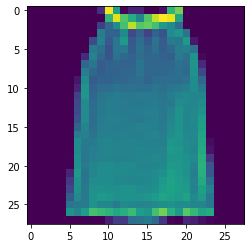

In [13]:
plt.imshow(images[0].squeeze())

## Problem 1
Fix batch size to 64 and start with 10 candidate learning rates between $10^{−9}$ and $10^1$ and train your model for 5 epochs. Plot the training accuracy as a function of the learning rate. You should see a curve like Figure 3 in the reference below. From that figure identify the values of $lr_{min}$ and $lr_{max}$. (2)

In [21]:
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9,0.999))

In [22]:
def train(model, epoch, optimizer, train_loader, test_loader, train_acc):   
    model.train()
    correct = 0
    total = 0
    
    # training our model
    for epo in range(epoch):
      print("{} epoch".format(epo))
      for batch_idx, (image, label) in enumerate(train_loader):
        image, label = image.to(device), label.to(device)
        optimizer.zero_grad()
        pred = model(image)

        loss = loss_fn(pred, label)

        loss.backward()
        optimizer.step()
    
    model.eval()
    for batch_idx, (image, label) in enumerate(test_loader):
      image, label = image.to(device), label.to(device)
      pred = model(image)

      _, predicted = pred.max(1)
      total += label.size(0)
      correct += predicted.eq(label).sum().item() 
    train_acc.append(100. * correct / total)
    print(100. * correct / total)

In [30]:
learning_rate = [1e-9, 1e-8, 1e-7, 1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10]
print(learning_rate)

[1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]


In [32]:
train_acc = []
for learn_rate in learning_rate:
    print(learn_rate)
    model = MiniGoogLeNet(10, 28, 1)
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate, betas=(0.9,0.999)) 
    train(model, 5, optimizer, train_loader, test_loader, train_acc)
    torch.cuda.empty_cache()

1e-09
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
9.48
1e-08
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
12.98
1e-07
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
36.01
1e-06
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
75.49
1e-05
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
88.46
0.0001
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
91.4
0.001
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
92.43
0.01
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
91.08
0.1
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
85.14
1
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
10.01
10
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
10.0


Text(0, 0.5, 'accuracy')

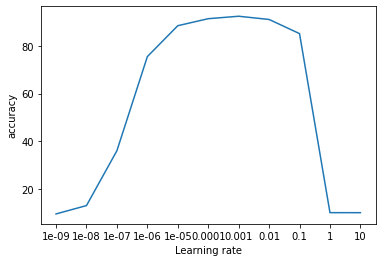

In [41]:
x_label = [str(i) for i in learning_rate]
plt.plot(x_label, train_acc)
plt.xlabel("Learning rate")
plt.ylabel("accuracy")

## Problem 2
Use the cyclical learning rate policy (with exponential decay) and train your network using batch size 64 and  lrmin  and  lrmax  values obtained in part 1. Plot train/validation loss and accuracy curve (similar to Figure 4 in reference). (3)

In [16]:
def train_with_lr(model, epoch, optimizer, scheduler, train_loader, test_loader, train_acc_history, train_loss_history):   
    
    
    # training our model
    for epo in range(epoch):
      print("{} epoch".format(epo))
      correct = 0
      total = 0
      for batch_idx, (image, label) in enumerate(train_loader):
        model.train()
        image, label = image.to(device), label.to(device)
        optimizer.zero_grad()
        pred = model(image)

        loss = loss_fn(pred, label)
        loss.backward()
        optimizer.step()
        scheduler.step()
        train_loss_history.append(loss.item())
    
        model.eval()

        _, predicted = pred.max(1)
        total += label.size(0)
        correct += predicted.eq(label).sum().item() 
        train_acc_history.append(100. * correct / total)
        print(100. * correct / total)
    #print(100. * correct / total)

In [17]:
train_acc_history = []
train_loss_history = []
model = MiniGoogLeNet(10, 28, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999)) 
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-7, max_lr=1e-2, cycle_momentum=False)
model.to(device)
train_with_lr(model, 5, optimizer, scheduler, train_loader, test_loader, train_acc_history, train_loss_history)


0 epoch
3.125
3.90625
7.8125
7.421875
7.8125
8.854166666666666
9.151785714285714
10.15625
11.631944444444445
11.40625
11.221590909090908
11.848958333333334
12.860576923076923
13.504464285714286
13.75
15.0390625
16.544117647058822
17.53472222222222
18.42105263157895
19.453125
20.386904761904763
21.448863636363637
22.282608695652176
23.177083333333332
24.0
24.51923076923077
25.462962962962962
26.116071428571427
26.939655172413794
27.864583333333332
28.72983870967742
29.541015625
30.35037878787879
31.158088235294116
31.696428571428573
32.421875
33.15033783783784
33.922697368421055
34.4150641025641
35.1953125
35.89939024390244
36.38392857142857
36.809593023255815
37.57102272727273
38.125
38.92663043478261
39.494680851063826
40.0390625
40.68877551020408
41.28125
41.85049019607843
42.42788461538461
42.865566037735846
43.229166666666664
43.69318181818182
44.140625
44.51754385964912
45.016163793103445
45.68326271186441
46.276041666666664
46.79815573770492
47.30342741935484
47.71825396825397
48

77.06380208333333
77.07575363825364
77.11034751037344
77.14479813664596
77.17264979338843
77.1971649484536
77.2119341563786
77.21701745379877
77.23488729508196
77.24948875255623
77.2608418367347
77.28169551934828
77.3024644308943
77.31364097363083
77.32477226720648
77.33901515151516
77.35005040322581
77.3610412474849
77.37826305220884
77.38915330661322
77.396875
77.40456586826348
77.42156374501992
77.43849403578528
77.44915674603175
77.45977722772277
77.4703557312253
77.49321992110454
77.51599409448819
77.53867878192534
77.55208333333333
77.55931996086106
77.57568359375
77.5858918128655
77.602140077821
77.60315533980582
77.62839147286822
77.65957446808511
77.64840733590734
77.65534682080924
77.67127403846153
77.70213531669866
77.70893199233717
77.7097275334608
77.71648377862596
77.74107142857143
77.76853612167301
77.77514231499052
77.79651988636364
77.8148629489603
77.83313679245283
77.86016949152543
77.88710056390977
77.9109990619137
77.92895599250936
77.94392523364486
77.955923507462

88.54166666666667
88.9423076923077
88.95089285714286
88.54166666666667
88.57421875
88.97058823529412
88.71527777777777
88.89802631578948
88.90625
88.98809523809524
88.99147727272727
88.8586956521739
88.99739583333333
88.875
88.88221153846153
89.00462962962963
88.72767857142857
88.63146551724138
88.59375
88.65927419354838
88.37890625
88.39962121212122
88.55698529411765
88.52678571428571
88.49826388888889
88.42905405405405
88.44572368421052
88.34134615384616
88.28125
88.22408536585365
88.13244047619048
88.26308139534883
88.21022727272727
88.22916666666667
88.14538043478261
88.2313829787234
88.24869791666667
88.2015306122449
88.15625
88.2046568627451
88.34134615384616
88.35495283018868
88.51273148148148
88.57954545454545
88.58816964285714
88.51425438596492
88.44288793103448
88.42690677966101
88.22916666666667
88.24282786885246
88.25604838709677
88.24404761904762
88.3056640625
88.10096153846153
88.13920454545455
88.12966417910448
88.2123161764706
88.26992753623189
88.19196428571429
88.2482

88.524377593361
88.52872670807453
88.52014462809917
88.52448453608247
88.50951646090535
88.51706878850102
88.52138831967213
88.53208077709611
88.54591836734694
88.55015274949083
88.55436991869918
88.55223123732252
88.55326417004049
88.54797979797979
88.5647681451613
88.57205734406439
88.5824548192771
88.58967935871743
88.590625
88.59468562874251
88.59561752988049
88.59654572564612
88.58506944444444
88.57054455445545
88.574604743083
88.5724852071006
88.57037401574803
88.57441060903733
88.58149509803921
88.58855185909981
88.580322265625
88.56907894736842
88.57307879377431
88.58919902912622
88.57497577519379
88.57591876208897
88.57685810810811
88.58381502890174
88.58473557692308
88.58565259117083
88.57459291187739
88.57851338432123
88.58838263358778
88.58035714285714
88.56939163498099
88.5673624288425
88.5653409090909
88.56037334593573
88.56132075471699
88.56226459510358
88.56907894736842
88.57293621013133
88.55922284644194
88.56892523364486
88.56110074626865
88.56494413407822
88.55425185

90.17857142857143
89.6875
89.2578125
88.78676470588235
88.88888888888889
89.0625
89.0625
88.91369047619048
89.0625
89.19836956521739
89.38802083333333
89.625
89.36298076923077
89.23611111111111
89.17410714285714
89.33189655172414
89.53125
89.76814516129032
89.84375
89.91477272727273
89.98161764705883
90.04464285714286
90.10416666666667
90.03378378378379
90.17269736842105
90.06410256410257
89.9609375
90.01524390243902
89.99255952380952
89.89825581395348
89.91477272727273
89.79166666666667
89.6399456521739
89.76063829787235
89.71354166666667
89.63647959183673
89.6875
89.70588235294117
89.75360576923077
89.71108490566037
89.64120370370371
89.6590909090909
89.62053571428571
89.69298245614036
89.73599137931035
89.77754237288136
89.84375
89.88217213114754
89.89415322580645
89.95535714285714
89.9658203125
89.97596153846153
90.0094696969697
90.01865671641791
89.98161764705883
90.01358695652173
90.04464285714286
90.07482394366197
90.08246527777777
90.04708904109589
90.13935810810811
90.16666666

90.31059451219512
90.3048935091278
90.31186740890688
90.32512626262626
90.3225806451613
90.32633299798793
90.3237951807229
90.31500501002004
90.3125
90.32871756487026
90.3355328685259
90.34542743538768
90.32738095238095
90.32178217821782
90.331645256917
90.32606015779093
90.3328001968504
90.33337426326129
90.34007352941177
90.331457925636
90.3350830078125
90.33564814814815
90.33621108949416
90.33677184466019
90.34338662790698
90.3499758220503
90.35955598455598
90.36307803468208
90.37259615384616
90.37308061420346
90.37954980842912
90.38599426386233
90.38346851145039
90.38392857142857
90.39923954372624
90.39077324478178
90.40305397727273
90.4093809073724
90.41568396226415
90.42196327683615
90.42528195488721
90.43151969981238
90.42602996254682
90.43516355140187
90.4471781716418
90.45041899441341
90.4594563197026
90.45976345083488
90.46296296296296
90.471926987061
90.46932656826569
90.47536832412523
90.47277113970588
90.47591743119266
90.48191391941391
90.48788848263254
90.49098996350365


92.64322916666667
92.5625
92.60817307692308
92.70833333333333
92.74553571428571
92.67241379310344
92.86458333333333
92.89314516129032
93.017578125
93.03977272727273
93.01470588235294
92.99107142857143
93.09895833333333
93.15878378378379
93.2154605263158
93.22916666666667
93.359375
93.14024390243902
93.19196428571429
93.13226744186046
93.03977272727273
92.98611111111111
92.96875
92.88563829787235
92.93619791666667
92.85714285714286
92.875
92.86151960784314
92.90865384615384
92.89504716981132
92.88194444444444
92.89772727272727
92.85714285714286
92.7905701754386
92.83405172413794
92.84957627118644
92.83854166666667
92.82786885245902
92.81754032258064
92.85714285714286
92.919921875
92.88461538461539
92.94507575757575
92.91044776119404
92.87683823529412
92.77626811594203
92.8125
92.82570422535211
92.86024305555556
92.89383561643835
92.86317567567568
92.89583333333333
92.92763157894737
92.9586038961039
93.0088141025641
92.99841772151899
92.96875
92.97839506172839
92.98780487804878
92.978162

93.0105198019802
92.99962944664031
93.00110946745562
93.00873523622047
93.01019155206286
93.02389705882354
93.01920254403132
93.017578125
93.02509746588694
93.02954766536965
93.02791262135922
93.03234011627907
93.03070599613153
93.03812741312741
93.03046724470134
93.03485576923077
93.04222648752399
93.04657567049809
93.04493307839388
93.03733301526718
93.0297619047619
93.03113117870723
93.02953036053131
93.02793560606061
93.023393194707
93.0129716981132
93.01435969868173
93.015742481203
93.02005159474672
93.02141853932584
93.02278037383178
93.01830690298507
93.01966945996276
93.01812267657992
93.01948051948052
93.02951388888889
93.03084565619224
93.02640682656826
93.02198434622468
93.02332261029412
93.02178899082568
93.02312271062272
93.01588208409507
93.01151916058394
93.01001821493625
93.00852272727273
93.01837568058076
93.01970108695652
93.01537070524412
93.02233754512635
93.02083333333333
93.02214478417267
93.0318671454219
93.03595430107526
93.04561717352415
93.04966517857143
93.04

95.2724358974359
95.2734375
95.23628048780488
95.3125
95.3125
95.3125
95.27777777777777
95.27853260869566
95.34574468085107
95.21484375
95.21683673469387
95.25
95.22058823529412
95.25240384615384
95.19457547169812
95.13888888888889
95.14204545454545
95.14508928571429
95.20285087719299
95.23168103448276
95.20656779661017
95.18229166666667
95.21004098360656
95.2116935483871
95.18849206349206
95.2392578125
95.1923076923077
95.24147727272727
95.17257462686567
95.12867647058823
95.06340579710145
95.06696428571429
95.04841549295774
95.07378472222223
95.0556506849315
95.05912162162163
95.08333333333333
95.0657894736842
95.0487012987013
95.05208333333333
95.05537974683544
95.09765625
95.1003086419753
95.10289634146342
95.105421686747
95.16369047619048
95.1654411764706
95.14898255813954
95.16882183908046
95.17045454545455
95.18960674157303
95.19097222222223
95.20947802197803
95.19361413043478
95.22849462365592
95.2127659574468
95.23026315789474
95.24739583333333
95.24806701030928
95.28061224489

95.21013969171483
95.20733173076923
95.20753358925144
95.21072796934865
95.21092256214149
95.20813454198473
95.19940476190476
95.20259030418251
95.20576375711575
95.20892518939394
95.20616729678639
95.20931603773585
95.20951035781545
95.2155780075188
95.218691369606
95.21008895131087
95.20735981308411
95.20755597014926
95.2048417132216
95.21085037174721
95.2081400742115
95.21412037037037
95.21719038817005
95.22313191881919
95.22617403314918
95.21484375
95.22075688073394
95.22378663003663
95.20680987202925
95.21555656934306
95.21004098360656
95.20738636363636
95.21608439201452
95.21908967391305
95.2136075949367
95.21378610108303
95.21114864864865
95.2113309352518
95.20870736086177
95.2116935483871
95.21466905187836
95.20647321428571
95.19830659536542
95.20407028469751
95.20426287744228
95.20445478723404
95.20464601769912
95.20759717314488
95.20778218694885
95.2024647887324
95.18892794376099
95.1781798245614
95.18388791593695
95.18138111888112
95.17888307155323
95.17911585365853
95.1875


In [18]:
torch.save(train_acc_history, "Lab3_3_train_acc_history.pkl")
torch.save(train_loss_history, "Lab3_3_train_loss_history.pkl")

Text(0, 0.5, 'train accuracy')

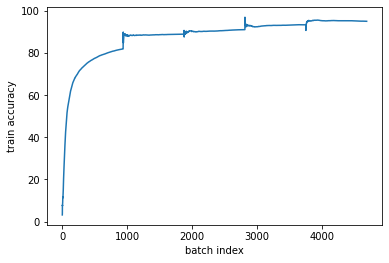

In [42]:
plt.plot(train_acc_history)
plt.xlabel("batch index")
plt.ylabel("train accuracy")

Text(0, 0.5, 'train loss')

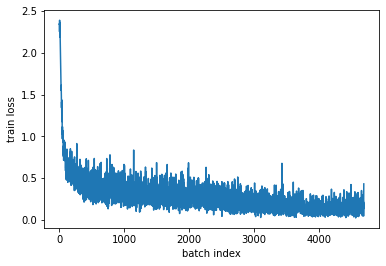

In [43]:
plt.plot(train_loss_history)
plt.xlabel("batch index")
plt.ylabel("train loss")

In [45]:
print(scheduler.get_lr())

[0.0034500655000000067]


/home/by2034/.local/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:1167: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


## Problem 3
We want to test if increasing batch size for a fixed learning rate has the same effect as decreasing learning rate for fixed batch size. Fix learning rate to $lr_{max}$ and train your network starting with batch size 32 and incrementally going up to 16384 (in increments of a factor of 2; like 32, 64...). You can choose a step size (in terms of the number of iterations) to increment the batch size. If your GPU cannot handle large batch sizes, you need to employ an effective batch size approach as discussed in Lecture 3 to simulate large batches. Plot the training loss. Is the generalization of your final model similar or different from than cyclical learning rate policy? (10)

In [3]:
lr = 0.01
loss_fn = nn.CrossEntropyLoss()

batch_size = 32
#Loading the dataset and preprocessing
train_dataset = torchvision.datasets.FashionMNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.5,), std = (0.5,))]),
                                           download = True)


test_dataset = torchvision.datasets.FashionMNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.5,), std = (0.5,))]),
                                          download=True)


train_loader= torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [5]:
model = MiniGoogLeNet(10, 28, 1)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999)) 

In [6]:
def train_with_large_batch(model, epoch, train_loader, train_acc_history, train_loss_history):   
    
    accum_iter = 1
    # training our model
    for epo in range(epoch):
        print("{} epoch".format(epo))
        correct = 0
        total = 0
        
        for batch_idx, (image, label) in enumerate(train_loader):
            model.train()
            image, label = image.to(device), label.to(device)
            with torch.set_grad_enabled(True):
                
                pred = model(image)

                loss = loss_fn(pred, label)
                loss = loss / accum_iter 
                
                loss.backward()
            
                train_loss_history.append(loss.item())

                _, predicted = pred.max(1)
                total += label.size(0)
                correct += predicted.eq(label).sum().item() 
                train_acc_history.append(100. * correct / total)
                print(100. * correct / total)
                # weights update
                if ((batch_idx + 1) % accum_iter == 0) or (batch_idx + 1 == len(data_loader)):
                    optimizer.step()
                    optimizer.zero_grad()
    accum_iter *= 2

In [7]:
train_acc_history_batch = []
train_loss_history_batch = []
train_with_large_batch(model, 10, train_loader, train_acc_history_batch, train_loss_history_batch)

0 epoch
3.125
9.375
16.666666666666668
23.4375
26.25
28.125
30.357142857142858
34.375
37.15277777777778
38.4375
38.92045454545455
39.0625
41.10576923076923
43.080357142857146
44.583333333333336
44.7265625
45.955882352941174
46.00694444444444
46.875
47.03125
47.61904761904762
48.4375
49.32065217391305
49.479166666666664
49.625
49.87980769230769
50.34722222222222
51.004464285714285
51.724137931034484
52.1875
52.721774193548384
53.80859375
53.88257575757576
54.595588235294116
55.089285714285715
55.03472222222222
54.983108108108105
55.098684210526315
55.60897435897436
55.9375
56.25
56.398809523809526
56.61337209302326
56.67613636363637
57.083333333333336
57.54076086956522
57.912234042553195
58.0078125
58.16326530612245
58.5
58.76225490196079
58.95432692307692
59.08018867924528
59.375
59.48863636363637
59.765625
60.0328947368421
60.12931034482759
60.38135593220339
60.677083333333336
61.0655737704918
61.340725806451616
61.70634920634921
61.767578125
62.06730769230769
62.21590909090909
62.639

78.01568930041152
78.03516427104722
78.0545594262295
78.05470347648262
78.08035714285714
78.09317718940937
78.125
78.13767748478702
78.1503036437247
78.15025252525253
78.17540322580645
78.20045271629779
78.2191265060241
78.2314629258517
78.2625
78.2871756487026
78.28685258964144
78.29895626242545
78.3110119047619
78.32920792079207
78.34115612648222
78.32840236686391
78.34645669291339
78.37057956777996
78.38848039215686
78.40019569471625
78.40576171875
78.40521442495127
78.40466926070039
78.41626213592232
78.41569767441861
78.42722437137331
78.44473938223938
78.47422928709057
78.4795673076923
78.49688099808061
78.51412835249042
78.53130975143404
78.54246183206106
78.55357142857143
78.54681558935361
78.54008538899431
78.53929924242425
78.54442344045368
78.5495283018868
78.56049905838042
78.57142857142857
78.57645403377111
78.5814606741573
78.59813084112149
78.59724813432835
78.60218808193669
78.60130111524164
78.60621521335807
78.61689814814815
78.6275415896488
78.62084870848709
78.63144

81.73253676470588
81.74186778593914
81.75445492662473
81.76047120418848
81.76320606694561
81.75940438871473
81.76539665970772
81.76160062565172
81.767578125
81.76053590010406
81.77299896049897
81.77894600207685
81.77839730290457
81.7940414507772
81.80318322981367
81.81553774560497
81.82463842975207
81.83372033023736
81.84600515463917
81.84217301750772
81.8479938271605
81.8570143884892
81.86280800821355
81.86538461538461
81.86155225409836
81.86412487205732
81.86669222903886
81.86606230847804
81.87181122448979
81.88391946992864
81.88645621181263
81.88262970498474
81.89151422764228
81.90355329949239
81.90922920892496
81.90856129685918
81.92054655870446
81.92934782608695
81.94128787878788
81.95005045408678
81.94934475806451
81.94864048338368
81.9636569416499
81.97236180904522
81.97477409638554
81.98345035105316
81.99210921843688
81.99762262262263
82.0
81.99925074925075
81.99538423153693
82.00087238285144
82.00323705179282
82.01803482587064
82.01416500994036
82.02271598808342
82.02194940476

83.80681818181819
83.81382042253522
83.81421534130894
83.81680731364276
83.81500351370345
83.82198033707866
83.82675438596492
83.82713884992988
83.83190259285213
83.83665966386555
83.84359692092373
83.84615384615384
83.84433962264151
83.84907472067039
83.85816468946267
83.8585251046025
83.86106271777004
83.86577298050139
83.87047668754349
83.86865438108484
83.86683460736623
83.86935763888889
83.87838306731436
83.87005894590845
83.87907137907138
83.88590720221606
83.89273356401384
83.89090594744121
83.8955597788528
83.89804903314918
83.90053485162181
83.90301724137932
83.901188835286
83.9036673553719
83.89969029593944
83.90861416781293
83.9110824742268
83.91354739010988
83.91600892244338
83.9184670781893
83.91877998629198
83.92551369863014
83.93009924709104
83.93254103967168
83.93497949419002
83.9352800546448
83.93771331058021
83.93587994542975
83.94256987048398
83.94712193460491
83.9537950987066
83.95195578231292
83.95436777702244
83.95677649456522
83.95918194161575
83.95734396200814
8

90.9090909090909
90.88541666666667
91.10576923076923
91.07142857142857
90.20833333333333
90.4296875
90.625
90.45138888888889
90.46052631578948
90.46875
90.47619047619048
90.48295454545455
90.35326086956522
90.234375
90.125
90.02403846153847
90.27777777777777
90.06696428571429
90.08620689655173
89.89583333333333
90.12096774193549
90.4296875
90.43560606060606
90.44117647058823
90.44642857142857
90.53819444444444
90.54054054054055
90.54276315789474
90.625
90.46875
90.54878048780488
90.17857142857143
90.33430232558139
90.1278409090909
90.20833333333333
89.94565217391305
89.82712765957447
89.90885416666667
89.9234693877551
89.9375
89.95098039215686
90.14423076923077
90.27122641509433
90.04629629629629
89.82954545454545
89.84375
89.74780701754386
89.81681034482759
89.61864406779661
89.6875
89.70286885245902
89.66733870967742
89.78174603174604
89.794921875
89.75961538461539
89.82007575757575
89.78544776119404
89.56801470588235
89.44746376811594
89.41964285714286
89.39260563380282
89.366319444

90.05855397148676
90.05335365853658
90.04817444219067
90.03669028340082
90.03787878787878
90.02016129032258
90.0213782696177
90.02259036144578
90.02379759519039
90.0375
90.01372255489022
90.01494023904382
90.01615308151094
90.0235615079365
90.02475247524752
90.03211462450592
90.03328402366864
90.04675196850394
90.0417485265226
90.03676470588235
90.01345401174169
90.00244140625
90.00974658869396
90.0170233463035
90.02427184466019
90.03149224806202
90.02659574468085
90.02775096525096
90.02288053949904
90.0360576923077
90.04318618042227
90.02634099616859
90.03943594646272
90.03458969465649
90.03571428571429
90.04277566539923
90.04388045540797
90.02722537878788
89.9929111531191
90.00589622641509
90.0011770244821
90.00234962406014
90.02110694183865
90.02223782771536
90.01168224299066
90.01282649253731
90.01978584729981
90.03252788104089
90.03362708719851
90.04050925925925
90.05314232902033
90.05419741697418
90.05524861878453
90.04480698529412
90.05160550458716
90.03548534798534
90.036563071

90.05474452554745
90.04557291666667
90.0526795005203
90.04677754677755
90.04088785046729
90.0382520746888
90.03886010362694
90.04270186335404
90.04976732161323
90.04067665289256
90.04450464396285
90.04188144329896
90.03604531410916
90.03343621399176
90.0436793422405
90.04427618069815
90.05128205128206
90.05827356557377
90.05885363357216
90.05304192229039
90.0408580183861
90.03507653061224
90.02930682976555
90.03309572301426
90.0336978636826
90.03747459349593
90.04441624365482
90.04817444219067
90.05192502532928
90.05250506072875
90.0530839231547
90.05366161616162
90.05423814328961
90.05166330645162
90.04909365558912
90.0465291750503
90.04711055276383
90.04455321285141
90.04200100300903
90.03945390781563
90.04316816816817
90.0375
90.04433066933066
90.03867265469061
90.03925722831505
90.0491782868526
90.04975124378109
90.0472166998012
90.05089374379345
90.0390625
90.04583746283448
90.04641089108911
90.05007418397626
90.05373023715416
90.0542941757157
90.05485700197238
90.04926108374384
9

90.13411640953717
90.13884022424668
90.1391806722689
90.13733379986004
90.1354895104895
90.13364779874213
90.13399092178771
90.13651430565248
90.13903417015342
90.13719512195122
90.13971100278552
90.14222338204593
90.14473226703755
90.14723766504517
90.14539930555556
90.14573213046495
90.1503987517337
90.15505890505891
90.16187673130194
90.15787197231833
90.15603388658369
90.15635798203179
90.15883977900552
90.14837819185645
90.15517241379311
90.15549620951069
90.1536673553719
90.15614246386787
90.15646492434664
90.16323024054982
90.16569368131869
90.17029855868222
90.1684670781893
90.16449623029472
90.16481164383562
90.16726557152636
90.171853625171
90.1742993848257
90.17247267759562
90.17704778156997
90.1837482946794
90.1840490797546
90.18434945504087
90.18464942137508
90.18920068027211
90.18737253569
90.18342391304348
90.18372369314325
90.18402306648575
90.1885593220339
90.18885501355014
90.1870345294516
90.18733085250338
90.1855138607167
90.19003378378379
90.19032748143147
90.19483

90.99264705882354
91.14583333333333
91.61184210526316
91.5625
91.66666666666667
91.76136363636364
91.16847826086956
91.40625
91.375
91.58653846153847
91.55092592592592
91.51785714285714
91.59482758620689
91.5625
91.43145161290323
91.40625
91.47727272727273
91.26838235294117
91.25
91.14583333333333
90.96283783783784
91.03618421052632
91.02564102564102
91.015625
90.9298780487805
90.99702380952381
90.91569767441861
90.9090909090909
90.90277777777777
91.10054347826087
91.22340425531915
91.34114583333333
91.45408163265306
91.375
91.4828431372549
91.5264423076923
91.56839622641509
91.55092592592592
91.64772727272727
91.796875
91.77631578947368
91.86422413793103
91.84322033898304
91.77083333333333
91.75204918032787
91.83467741935483
91.86507936507937
91.845703125
91.97115384615384
92.04545454545455
92.07089552238806
92.09558823529412
92.02898550724638
91.96428571428571
92.03345070422536
92.01388888888889
91.90924657534246
91.97635135135135
91.875
91.9407894736842
91.9237012987013
91.866987179

91.65826612903226
91.65618712273641
91.66039156626506
91.64579158316633
91.65625
91.66666666666667
91.65214143426294
91.66252485089463
91.67286706349206
91.65841584158416
91.65637351778656
91.6543392504931
91.65231299212599
91.64415520628684
91.64828431372548
91.65239726027397
91.656494140625
91.67275828460039
91.65856031128405
91.65655339805825
91.65455426356588
91.65256286266924
91.6626447876448
91.66666666666667
91.65865384615384
91.656669865643
91.65469348659003
91.6706500956023
91.67461832061069
91.67261904761905
91.67656844106465
91.67457305502846
91.67258522727273
91.67651228733459
91.6627358490566
91.67255178907722
91.65883458646617
91.65103189493433
91.64911048689139
91.66471962616822
91.66277985074628
91.67830540037244
91.68796468401487
91.69179035250464
91.70138888888889
91.71095194085028
91.72624538745387
91.72997237569061
91.73368566176471
91.74885321100918
91.75251831501832
91.76188299817184
91.77121350364963
91.75774134790528
91.76704545454545
91.77631578947368
91.751585

91.72183281412254
91.7239367219917
91.72279792746114
91.73136645962732
91.72699069286453
91.7290805785124
91.73116615067079
91.7332474226804
91.73854273944387
91.73418209876543
91.73946557040082
91.74152977412732
91.74358974358974
91.7360399590164
91.728505629478
91.73057259713701
91.7326353421859
91.73469387755102
91.7335626911315
91.72288696537679
91.71541200406918
91.71747967479675
91.71954314720813
91.71843306288032
91.72365754812563
91.72887145748987
91.72775530839232
91.73611111111111
91.73183652875883
91.73387096774194
91.73590130916415
91.74107142857143
91.74309045226131
91.74824297188755
91.74711634904715
91.75225450901803
91.75425425425425
91.75
91.74887612387613
91.75087325349301
91.74351944167498
91.73929282868527
91.72885572139303
91.72465208747515
91.72045680238331
91.72867063492063
91.72447968285431
91.72957920792079
91.7253956478734
91.73048418972331
91.72939289239882
91.7344674556213
91.73337438423646
91.7353592519685
91.73734021632252
91.73624754420432
91.738223748773

91.69874037788664
91.69361888111888
91.69287211740041
91.69212639664805
91.6913817166783
91.69063807531381
91.69425087108014
91.69133008356546
91.6927627000696
91.69202016689847
91.6912786657401
91.69704861111111
91.69630464954892
91.69556171983356
91.69048856548856
91.69407894736842
91.6955017301038
91.68827800829875
91.68970283344851
91.693283839779
91.69038992408558
91.6875
91.68892143349414
91.69249311294766
91.68745698554714
91.68672627235213
91.6881443298969
91.68312156593407
91.68668496911462
91.68810013717422
91.68737148732008
91.68450342465754
91.68805612594113
91.69160396716826
91.69301093643199
91.69441598360656
91.69581911262799
91.69935197817189
91.69861963190183
91.69575953678473
91.69290333560245
91.69642857142857
91.69357579877634
91.69709578804348
91.69636795655126
91.69988127544097
91.70127118644068
91.69842479674797
91.69346648612051
91.69908660351827
91.6983603786342
91.70185810810811
91.70113099257259
91.70462213225372
91.70600134861766
91.70106132075472
91.6982323

92.5
92.41071428571429
92.4715909090909
92.3913043478261
92.44791666666667
92.625
92.66826923076923
92.82407407407408
92.74553571428571
92.78017241379311
92.8125
92.94354838709677
92.7734375
92.70833333333333
92.73897058823529
92.94642857142857
92.70833333333333
92.82094594594595
92.76315789473684
92.78846153846153
92.8125
92.75914634146342
92.63392857142857
92.73255813953489
92.82670454545455
92.84722222222223
92.73097826086956
92.55319148936171
92.51302083333333
92.60204081632654
92.625
92.70833333333333
92.54807692307692
92.62971698113208
92.5925925925926
92.55681818181819
92.46651785714286
92.37938596491227
92.45689655172414
92.58474576271186
92.55208333333333
92.57172131147541
92.59072580645162
92.65873015873017
92.67578125
92.6923076923077
92.66098484848484
92.72388059701493
92.78492647058823
92.7536231884058
92.72321428571429
92.73767605633803
92.79513888888889
92.76541095890411
92.77871621621621
92.875
92.84539473684211
92.77597402597402
92.70833333333333
92.68196202531645
92.6

92.68108651911469
92.6832329317269
92.68537074148297
92.68125
92.67090818363273
92.66683266932272
92.67519880715706
92.67113095238095
92.68564356435644
92.68774703557312
92.68984220907298
92.69192913385827
92.68786836935168
92.69607843137256
92.6981409001957
92.706298828125
92.70833333333333
92.71643968871595
92.7245145631068
92.70833333333333
92.69221470019342
92.68822393822394
92.6842485549133
92.6923076923077
92.67634357005758
92.68438697318008
92.6744741873805
92.68249045801527
92.69047619047619
92.69843155893535
92.71228652751424
92.72017045454545
92.71620982986768
92.71816037735849
92.70244821092278
92.70441729323308
92.71810506566604
92.72003745318352
92.72780373831776
92.74137126865672
92.725791433892
92.73350371747212
92.74118738404452
92.7488425925926
92.7449168207024
92.74677121771218
92.75437384898711
92.75045955882354
92.7637614678899
92.75984432234432
92.76165447897624
92.75205291970804
92.75387067395265
92.75
92.75748638838475
92.7536231884058
92.76107594936708
92.757220

92.73963730569949
92.7439182194617
92.74819027921406
92.73631198347107
92.72445820433437
92.73195876288659
92.73622554067971
92.73726851851852
92.73509763617677
92.73934804928132
92.74038461538461
92.73181352459017
92.73605424769703
92.73389570552148
92.72535750766087
92.72640306122449
92.73063200815494
92.73485234215886
92.73588504577823
92.73373983739837
92.73794416243655
92.74213995943205
92.74632725430598
92.7473431174089
92.74519716885743
92.75252525252525
92.75353178607467
92.75453629032258
92.7555387713998
92.7533953722334
92.75753768844221
92.75853413654619
92.75639418254764
92.75738977955912
92.74587087087087
92.746875
92.74787712287713
92.74887724550898
92.74987537387837
92.74775896414343
92.74875621890547
92.74975149105367
92.74453823237339
92.74553571428571
92.74343409316154
92.74752475247524
92.75160731948566
92.74641798418972
92.74740868706812
92.73915187376726
92.73399014778325
92.73191437007874
92.73598820058997
92.73698428290766
92.74104514229637
92.74509803921569
92.7

92.70687849162012
92.70324494068387
92.69961645746164
92.70034843205575
92.70543175487465
92.70615866388309
92.70253824756607
92.7032661570535
92.70399305555556
92.70471894517696
92.70544382801664
92.7061677061677
92.70472645429363
92.70544982698962
92.71049446749655
92.70905321354526
92.71408839779005
92.7148033126294
92.71767241379311
92.71407649896624
92.70833333333333
92.70474879559532
92.70976616231087
92.71262886597938
92.70904876373626
92.70976321207962
92.70618998628258
92.70262165867032
92.70547945205479
92.70833333333333
92.70690834473324
92.70975734791524
92.71046789617486
92.70264505119454
92.70549113233288
92.706203135651
92.70265667574932
92.70549693669163
92.70408163265306
92.70904146838885
92.7055027173913
92.70621181262729
92.7047998643148
92.70338983050847
92.70409891598916
92.70692281651998
92.70551420838972
92.704107505071
92.70270270270271
92.70340985820391
92.70833333333333
92.70903573836817
92.705525606469
92.70622895622895
92.71113728129205
92.71183591123066
92.

93.61979166666667
93.875
93.99038461538461
93.86574074074075
94.08482142857143
93.96551724137932
93.54166666666667
93.34677419354838
93.359375
93.27651515151516
93.38235294117646
93.39285714285714
93.40277777777777
93.49662162162163
93.58552631578948
93.6698717948718
93.671875
93.67378048780488
93.67559523809524
93.75
93.53693181818181
93.61111111111111
93.5461956521739
93.35106382978724
93.22916666666667
93.36734693877551
93.375
93.50490196078431
93.50961538461539
93.63207547169812
93.69212962962963
93.63636363636364
93.58258928571429
93.58552631578948
93.53448275862068
93.4322033898305
93.38541666666667
93.44262295081967
93.34677419354838
93.40277777777777
93.45703125
93.41346153846153
93.37121212121212
93.33022388059702
93.4283088235294
93.3876811594203
93.39285714285714
93.4419014084507
93.48958333333333
93.53595890410959
93.53885135135135
93.54166666666667
93.62664473684211
93.66883116883118
93.6298076923077
93.59177215189874
93.6328125
93.63425925925925
93.71189024390245
93.75
93

94.23459244532803
94.22123015873017
94.22648514851485
94.22554347826087
94.21844181459566
94.21136811023622
94.21046168958743
94.2095588235294
94.20254403131115
94.195556640625
94.19468810916179
94.18166342412451
94.16868932038835
94.17393410852713
94.16706963249517
94.16626447876448
94.15944123314065
94.15264423076923
94.15786948176583
94.15708812260536
94.15033460803059
94.14957061068702
94.1547619047619
94.15399239543726
94.16508538899431
94.1702178030303
94.16942344045368
94.15094339622641
94.15607344632768
94.16705827067669
94.16041275797373
94.16549625468164
94.1588785046729
94.15228544776119
94.15153631284916
94.16240706319702
94.16743970315399
94.16666666666667
94.17167282809612
94.17666051660517
94.18738489871086
94.17509191176471
94.18004587155963
94.17925824175825
94.1670475319927
94.16058394160584
94.15414389799636
94.14204545454545
94.14133393829401
94.140625
94.13991862567812
94.13921480144404
94.14414414414415
94.14905575539568
94.13150807899461
94.13082437275986
94.1245

93.65345005149331
93.65033436213992
93.65364850976361
93.65374743326488
93.65384615384616
93.65714651639344
93.66363868986694
93.67011758691207
93.66700715015321
93.6734693877551
93.66717635066259
93.6640784114053
93.66098677517803
93.65790142276423
93.66116751269035
93.66442697768763
93.67084599797366
93.67408906882591
93.68048533872599
93.68055555555556
93.6837790110999
93.68384576612904
93.68705941591138
93.68712273641852
93.69346733668341
93.69666164658635
93.69671514543631
93.69050601202404
93.69056556556556
93.690625
93.6938061938062
93.7000998003992
93.69703389830508
93.70019920318725
93.69713930348259
93.69408548707753
93.69724428997021
93.70349702380952
93.70973736372646
93.69740099009901
93.70363501483679
93.7098567193676
93.70989634748273
93.71301775147928
93.7192118226601
93.71616633858268
93.71619960668633
93.71316306483301
93.71933267909715
93.72242647058823
93.71633202742409
93.71942270058709
93.71945259042033
93.707275390625
93.71036585365853
93.70431286549707
93.701314

93.7152052887961
93.71740264255911
93.71525364836693
93.71310763888889
93.71313324080499
93.71315880721221
93.70885308385309
93.71320983379502
93.70891003460207
93.70893845089903
93.70896682791984
93.70899516574586
93.7111801242236
93.71336206896552
93.71554100620261
93.71126033057851
93.71128699242945
93.7134628610729
93.71348797250859
93.71136675824175
93.71139327385038
93.70927640603567
93.70716244002742
93.70719178082192
93.70508213552361
93.70725034199727
93.71155160628845
93.70730874316939
93.705204778157
93.70097203274216
93.70526584867076
93.70742506811989
93.70532675289313
93.703231292517
93.70751189666893
93.7096637228261
93.7096911065852
93.71183853459974
93.71186440677967
93.70977303523036
93.70980027081923
93.71405615696888
93.71619337390129
93.71621621621621
93.71412896691425
93.71837044534414
93.72049898853675
93.71841307277629
93.71422558922559
93.71635262449529
93.71427370544721
93.71429771505376
93.71642041638684
93.71854026845638
93.72065727699531
93.72067694369973
9

95.56686046511628
95.5965909090909
95.55555555555556
95.65217391304348
95.67819148936171
95.63802083333333
95.66326530612245
95.75
95.83333333333333
95.85336538461539
95.81367924528301
95.65972222222223
95.68181818181819
95.703125
95.72368421052632
95.63577586206897
95.65677966101696
95.67708333333333
95.64549180327869
95.71572580645162
95.53571428571429
95.5078125
95.48076923076923
95.45454545454545
95.5223880597015
95.54227941176471
95.47101449275362
95.35714285714286
95.29049295774648
95.22569444444444
95.16267123287672
95.1858108108108
95.125
95.14802631578948
95.12987012987013
95.15224358974359
95.13449367088607
95.1953125
95.17746913580247
95.19817073170732
95.2183734939759
95.20089285714286
95.18382352941177
95.05813953488372
95.00718390804597
94.99289772727273
95.01404494382022
95.06944444444444
95.12362637362638
95.04076086956522
95.06048387096774
95.07978723404256
95.0657894736842
94.98697916666667
95.00644329896907
95.05739795918367
94.98106060606061
94.875
94.86386138613861

94.64029636711281
94.6505248091603
94.64880952380952
94.64710076045627
94.65725806451613
94.65553977272727
94.65973534971644
94.65801886792453
94.65042372881356
94.66047932330827
94.66463414634147
94.66292134831461
94.6553738317757
94.64202425373135
94.61126629422719
94.62128252788104
94.6254638218924
94.62962962962963
94.63955637707949
94.64368081180812
94.65354511970534
94.66337316176471
94.6559633027523
94.64285714285714
94.6469378427788
94.65100364963503
94.64936247723134
94.6534090909091
94.65744101633393
94.66711956521739
94.65415913200724
94.6581678700361
94.64527027027027
94.62679856115108
94.63083482944344
94.62925627240143
94.62209302325581
94.62611607142857
94.63569518716578
94.63411921708185
94.62144760213144
94.62544326241135
94.62942477876106
94.62787102473499
94.62632275132275
94.62477992957747
94.62324253075572
94.62719298245614
94.6311295971979
94.62412587412588
94.60623909249564
94.60474738675958
94.6086956521739
94.60177951388889
94.60571923743501
94.60964532871972
9

94.44444444444444
94.43743693239152
94.43359375
94.43919939577039
94.44479376257546
94.44409547738694
94.44026104417671
94.43956870611835
94.44200901803607
94.44131631631632
94.434375
94.43056943056943
94.42989021956087
94.4260967098704
94.41608565737052
94.41853233830845
94.42097415506959
94.41720456802383
94.41964285714286
94.41897918731418
94.42141089108911
94.42074678536103
94.41699604743083
94.42250740375124
94.42184418145956
94.42733990147784
94.42667322834646
94.41986234021633
94.41920432220039
94.42161432777233
94.41482843137256
94.41417727717923
94.41352739726027
94.41593352883676
94.4183349609375
94.41463414634147
94.41703216374269
94.41942551119766
94.41877431906615
94.42116132167152
94.42050970873787
94.4198593598448
94.41618217054264
94.41856243949661
94.41791586073501
94.42028985507247
94.42265926640927
94.42502410800385
94.42437379576108
94.42372473532242
94.42908653846153
94.42843419788665
94.43378119001919
94.43312559923298
94.43247126436782
94.4377990430622
94.4371414

94.36556280027453
94.36514060356653
94.36686086360521
94.36857876712328
94.37029431895962
94.36987004103968
94.37371838687628
94.3754269125683
94.375
94.37670532060028
94.3762781186094
94.3715940054496
94.36691626957113
94.36224489795919
94.36182868796737
94.36353600543478
94.3652410047522
94.36694369063773
94.36228813559322
94.36610772357723
94.3699221394719
94.36950270635995
94.36908384043272
94.37077702702703
94.3682478055368
94.37204790823212
94.37162845583278
94.36910377358491
94.37079124579125
94.36616756393002
94.36575319435104
94.36323924731182
94.35653122901276
94.35402684563758
94.3536217303823
94.35112265415549
94.35281312793035
94.35031793842035
94.35200668896321
94.35160427807487
94.34911489645958
94.34662883845127
94.34831554369579
94.34166666666667
94.33919053964024
94.34295938748336
94.34464404524284
94.34009308510639
94.33970099667773
94.3351593625498
94.3347710683477
94.33231100795756
94.33399602385686
94.33360927152317
94.3352911978822
94.3390376984127
94.34277924653

96.06854838709677
96.0813492063492
96.044921875
96.00961538461539
95.9280303030303
95.8955223880597
95.86397058823529
95.92391304347827
95.9375
95.90669014084507
95.78993055555556
95.76198630136986
95.77702702702703
95.66666666666667
95.68256578947368
95.65746753246754
95.63301282051282
95.6882911392405
95.703125
95.7175925925926
95.73170731707317
95.74548192771084
95.72172619047619
95.69852941176471
95.67587209302326
95.65373563218391
95.5965909090909
95.57584269662921
95.625
95.6043956043956
95.65217391304348
95.63172043010752
95.67819148936171
95.65789473684211
95.67057291666667
95.71520618556701
95.75892857142857
95.80176767676768
95.8125
95.8230198019802
95.86397058823529
95.84344660194175
95.85336538461539
95.77380952380952
95.78419811320755
95.79439252336448
95.80439814814815
95.84288990825688
95.85227272727273
95.86148648648648
95.78683035714286
95.76880530973452
95.77850877192982
95.78804347826087
95.82435344827586
95.83333333333333
95.78919491525424
95.74579831932773
95.75520

95.59265249537893
95.57772140221402
95.58586556169429
95.58823529411765
95.5848623853211
95.5757783882784
95.57244058500915
95.55200729927007
95.54303278688525
95.54545454545455
95.54786751361162
95.5559329710145
95.55831826401446
95.56069494584838
95.54617117117117
95.54856115107914
95.55094254937164
95.54771505376344
95.54449910554561
95.55245535714286
95.54924242424242
95.53491992882562
95.5373001776199
95.52304964539007
95.52544247787611
95.53334805653711
95.5302028218695
95.53257042253522
95.52943760984182
95.53728070175438
95.52867775831874
95.53649475524476
95.53883071553228
95.53571428571429
95.53804347826087
95.54578993055556
95.5372616984402
95.54498269896193
95.54727979274611
95.54418103448276
95.53571428571429
95.54338487972508
95.54566895368782
95.54794520547945
95.5448717948718
95.54180887372014
95.53875638841568
95.5250850340136
95.52207130730051
95.52966101694915
95.52136209813875
95.52364864864865
95.52065767284992
95.51241582491582
95.49894957983193
95.50650167785236


95.23499503968254
95.22732903865213
95.22586633663366
95.23058852621168
95.22603754940711
95.22766535044423
95.22928994082841
95.23091133004927
95.23252952755905
95.23414454277287
95.23268664047151
95.23429833169774
95.22977941176471
95.22833006856024
95.22688356164383
95.21322091886609
95.2117919921875
95.20731707317073
95.20589668615985
95.20447906523856
95.19698443579766
95.19861516034986
95.19720873786407
95.18974296799225
95.19137596899225
95.18998063891578
95.18556576402321
95.18417874396135
95.17977799227799
95.18141272902604
95.18304431599229
95.18768046198268
95.18329326923077
95.18491834774255
95.18654030710172
95.18516299137104
95.18079501915709
95.17942583732058
95.17507170172084
95.1737106017192
95.17533396946565
95.17695424213537
95.17857142857143
95.17423882017127
95.17585551330798
95.17746913580247
95.17611480075901
95.17772511848341
95.17341382575758
95.17206717123936
95.17367674858222
95.17823418319169
95.17688679245283
95.17259660697455
95.17419962335217
95.175799623

95.1351121685928
95.13841711956522
95.13959606245757
95.1428934871099
95.14618644067797
95.14524051490515
95.14218009478672
95.14546684709066
95.14452332657201
95.14780405405405
95.14897029034437
95.14802631578948
95.14708361429534
95.14824797843666
95.14941077441077
95.15267496635262
95.14963012777405
95.14868951612904
95.14145399597045
95.14471476510067
95.14587525150905
95.14703418230563
95.14609845947756
95.14725568942437
95.14632107023411
95.14747660427807
95.14863059452237
95.14561081441923
95.14467978652435
95.14583333333333
95.1469853431046
95.14397470039947
95.14096806387225
95.13588763297872
95.13704318936877
95.14027224435591
95.1393497013935
95.14257294429709
95.1437210072896
95.14279801324503
95.14187624090006
95.14302248677248
95.14623265036352
95.14531043593131
95.14645214521452
95.1496536939314
95.15079103493737
95.15192687747036
95.15100394996708
95.15419407894737
95.15327087442472
95.15234888304862
95.15347997373605
95.15666010498688
95.15573770491804
95.1568643512450

96.75164473684211
96.71266233766234
96.67467948717949
96.6376582278481
96.640625
96.6820987654321
96.60823170731707
96.61144578313252
96.54017857142857
96.54411764705883
96.54796511627907
96.55172413793103
96.5909090909091
96.62921348314607
96.66666666666667
96.60027472527473
96.63722826086956
96.60618279569893
96.57579787234043
96.61184210526316
96.61458333333333
96.52061855670104
96.52423469387755
96.52777777777777
96.5625
96.56559405940594
96.47671568627452
96.38956310679612
96.33413461538461
96.30952380952381
96.31485849056604
96.29088785046729
96.29629629629629
96.18692660550458
96.16477272727273
96.17117117117117
96.17745535714286
96.21128318584071
96.24451754385964
96.25
96.22844827586206
96.26068376068376
96.29237288135593
96.24474789915966
96.27604166666667
96.22933884297521
96.26024590163935
96.23983739837398
96.24495967741936
96.25
96.20535714285714
96.23523622047244
96.2158203125
96.24515503875969
96.25
96.27862595419847
96.2594696969697
96.17011278195488
96.12873134328358


96.0222172351885
96.0293458781362
96.03085867620752
96.03236607142857
96.02829768270945
96.02980427046263
96.0313055062167
96.03280141843972
96.02323008849558
96.02473498233215
96.03174603174604
96.03873239436619
96.04569420035149
96.03618421052632
96.03765323992995
96.04458041958041
96.04602966841186
96.0529181184669
96.04891304347827
96.05034722222223
96.05177642980937
96.05320069204153
96.05462003454231
96.05603448275862
96.05744406196213
96.04810996563575
96.0495283018868
96.05629280821918
96.03098290598291
96.03775597269625
96.02853492333901
96.02997448979592
96.0314091680815
96.02754237288136
96.02897631133672
96.0304054054054
96.02129005059022
96.01746632996633
96.01365546218487
96.01510067114094
96.01130653266331
96.0127508361204
96.01419031719533
96.015625
96.02225457570715
96.02367109634551
96.02508291873964
96.03166390728477
96.02789256198348
96.01382013201321
96.01523887973642
96.01665296052632
96.02319376026273
96.01946721311475
96.02598199672667
96.02736928104575
96.02875

95.8770751953125
95.8780487804878
95.88206627680312
95.87390457643622
95.87487840466926
95.87585034013605
95.87378640776699
95.87475751697382
95.86967054263566
95.87064375605034
95.86859284332688
95.8665458937198
95.86148648648648
95.86246383799421
95.86042870905588
95.8463666987488
95.84134615384616
95.83633525456293
95.8403310940499
95.8443192713327
95.84530651340997
95.84928229665071
95.85026290630975
95.85124164278892
95.85221851145039
95.85319351763584
95.85416666666667
95.85811132254996
95.85610741444867
95.85707502374169
95.8521110056926
95.85308056872037
95.85700757575758
95.86092715231788
95.85893194706995
95.86284230406044
95.86084905660377
95.86180490103676
95.85981638418079
95.86371119473189
95.86759868421052
95.86854460093896
95.86655722326454
95.86164479850046
95.85966760299625
95.85477081384471
95.84404205607477
95.84500466853407
95.84013526119404
95.84401211556384
95.84788175046555
95.84593023255815
95.84107806691449
95.8391364902507
95.83719851576994
95.84105653382761


95.74454697986577
95.7474010731053
95.74815683646112
95.74681848626926
95.74548192771084
95.73996655518394
95.742814171123
95.74148296593187
95.74432576769026
95.73882588392262
95.74166666666666
95.74033977348435
95.7431757656458
95.74600798403193
95.74883643617021
95.74750830564784
95.75033200531209
95.75107830126078
95.75182360742706
95.75256792577866
95.7512417218543
95.75405360688286
95.75479497354497
95.75760079312624
95.75833883751652
95.7549504950495
95.75568931398416
95.75642715886619
95.75510540184453
95.75789993416721
95.75863486842105
95.7552596975674
95.75599540078844
95.75673013788575
95.751312335958
95.74795081967213
95.74664154652687
95.74328749181402
95.74198298429319
95.74068018312623
95.74346405228758
95.74012083605487
95.73882180156657
95.73752446183953
95.73826597131682
95.74104234527687
95.74178059895833
95.7425178919974
95.74122236671002
95.73992852501624
95.74066558441558
95.7414016872161
95.74416342412451
95.74287103046014
95.74158031088083
95.74029126213593
95.

96.72897196261682
96.73032407407408
96.73165137614679
96.76136363636364
96.79054054054055
96.81919642857143
96.84734513274336
96.875
96.875
96.84806034482759
96.8482905982906
96.82203389830508
96.84873949579831
96.84895833333333
96.875
96.90061475409836
96.875
96.875
96.9
96.89980158730158
96.89960629921259
96.8994140625
96.9234496124031
96.92307692307692
96.89885496183206
96.89867424242425
96.921992481203
96.89832089552239
96.92129629629629
96.9439338235294
96.94343065693431
96.92028985507247
96.94244604316546
96.94196428571429
96.94148936170212
96.96302816901408
96.96241258741259
96.91840277777777
96.9396551724138
96.875
96.85374149659864
96.875
96.83305369127517
96.85416666666667
96.8543046357616
96.85444078947368
96.83415032679738
96.85470779220779
96.85483870967742
96.8349358974359
96.83519108280255
96.85522151898734
96.83569182389937
96.85546875
96.8361801242236
96.85570987654322
96.83665644171779
96.83689024390245
96.81818181818181
96.81852409638554
96.80014970059881
96.80059523

96.64608177172062
96.64115646258503
96.63624787775892
96.64194915254237
96.64763113367174
96.64801520270271
96.63258853288364
96.63825757575758
96.63340336134453
96.63905201342281
96.64468174204355
96.65029264214047
96.65588480801335
96.65625
96.6514143094842
96.64140365448505
96.63660862354892
96.63182947019868
96.63223140495867
96.63263201320132
96.62788303130148
96.6282894736842
96.62869458128078
96.62909836065573
96.61927168576105
96.62479575163398
96.6303017944535
96.6307003257329
96.63617886178862
96.63656655844156
96.63188816855754
96.62722491909385
96.62257673667204
96.6179435483871
96.62338969404186
96.62379421221866
96.62921348314607
96.62960737179488
96.635
96.63538338658147
96.64074960127591
96.64112261146497
96.64149443561209
96.64186507936508
96.6323296354992
96.62776898734177
96.62815955766193
96.63347791798107
96.63877952755905
96.63423742138365
96.63461538461539
96.6349921630094
96.63536776212833
96.630859375
96.62148985959439
96.6267523364486
96.62713841368584
96.6323

96.4298433048433
96.43323055028463
96.43661137440758
96.43702651515152
96.43744087038789
96.44080812854442
96.44416902738432
96.44752358490567
96.44498114985862
96.44538606403013
96.44579021636876
96.437382518797
96.43485915492958
96.43820356472796
96.44154170571696
96.44487359550561
96.44819925163705
96.44567757009345
96.437324929972
96.43481809701493
96.43814072693382
96.43272811918064
96.43604651162791
96.43064591078067
96.43105849582173
96.42567254174396
96.42898517145505
96.42939814814815
96.42691951896393
96.4273336414048
96.42486149584488
96.42815959409594
96.42281105990783
96.42322744014733
96.42364305427783
96.42405790441177
96.4244719926538
96.42201834862385
96.4224335472044
96.42284798534799
96.42040256175663
96.41796160877514
96.41552511415524
96.41024178832117
96.404968094804
96.4082422586521
96.40582347588717
96.40625
96.4038374205268
96.40142921960073
96.40185856754306
96.3966259057971
96.39140271493213
96.39466546112116
96.39792231255646
96.39835288808665
96.40160054102

96.33670282708744
96.33500328515112
96.33740971766251
96.3377624671916
96.33811475409836
96.33846657929227
96.33881794368043
96.3412140052356
96.33747547416613
96.33986928104575
96.34225996080993
96.34464751958224
96.34499347684279
96.34737614080835
96.34771986970684
96.35009765625
96.35043916720885
96.35281209362809
96.35315139701105
96.35551948051948
96.35585658663206
96.35821984435798
96.35247893713544
96.35079339378238
96.3450647249191
96.34742884864166
96.34978991596638
96.35214793281654
96.35248547449967
96.35483870967742
96.35315925209542
96.35349548969072
96.3518190598841
96.35416666666667
96.35450160771704
96.35483611825192
96.35517019910084
96.35550385109114
96.35182809493264
96.35216346153847
96.35249839846253
96.3528329065301
96.34916826615483
96.34750639386189
96.34784345047923
96.34818007662835
96.34652201659222
96.34685905612245
96.34719566602932
96.34952229299363
96.35184595798854
96.35019083969466
96.35052447552448
96.35085768742059
96.34920634920636
96.3515228426396
9

97.3174778761062
97.28618421052632
97.22826086956522
97.22521551724138
97.22222222222223
97.21927966101696
97.21638655462185
97.23958333333333
97.23657024793388
97.25922131147541
97.2560975609756
97.25302419354838
97.25
97.24702380952381
97.26870078740157
97.265625
97.18992248062015
97.1875
97.18511450381679
97.18276515151516
97.18045112781955
97.17817164179104
97.15277777777777
97.15073529411765
97.12591240875912
97.12409420289855
97.12230215827338
97.09821428571429
97.09663120567376
97.11707746478874
97.11538461538461
97.13541666666667
97.13362068965517
97.15325342465754
97.15136054421768
97.17060810810811
97.16862416107382
97.14583333333333
97.14403973509934
97.14226973684211
97.140522875817
97.11850649350649
97.13709677419355
97.15544871794872
97.15366242038216
97.13212025316456
97.13050314465409
97.1484375
97.14673913043478
97.14506172839506
97.14340490797547
97.1608231707317
97.1780303030303
97.19503012048193
97.21182634730539
97.20982142857143
97.2078402366864
97.16911764705883


97.28146114864865
97.2860455311973
97.26430976430976
97.26365546218487
97.2630033557047
97.2571189279732
97.26170568561874
97.26627712854759
97.26041666666667
97.24937603993344
97.24875415282392
97.2481343283582
97.24234271523179
97.24690082644628
97.24628712871286
97.25082372322899
97.25534539473684
97.25472085385879
97.25922131147541
97.26370703764321
97.26817810457516
97.26753670473083
97.27198697068404
97.27134146341463
97.27069805194805
97.26499189627229
97.26941747572816
97.2687802907916
97.26814516129032
97.27254428341385
97.26185691318328
97.25621990369181
97.25560897435898
97.26
97.254392971246
97.2488038277512
97.24820859872611
97.23767885532591
97.2420634920635
97.24148177496038
97.24090189873418
97.24032385466035
97.2397476340694
97.22933070866142
97.22877358490567
97.23312401883831
97.22766457680251
97.22711267605634
97.2216796875
97.22113884555382
97.22546728971963
97.22978227060653
97.22923136645963
97.22868217054264
97.2281346749226
97.23241885625966
97.23186728395062
9

97.05795561850803
97.05483490566037
97.05466540999058
97.04861111111111
97.0513875823142
97.0453477443609
97.04518779342723
97.04795966228893
97.04779756326148
97.0505617977528
97.0533208606174
97.05023364485982
97.0500700280112
97.04699160447761
97.03809412861138
97.04085195530726
97.0436046511628
97.04635223048327
97.0461931290622
97.0489332096475
97.04877201112141
97.05150462962963
97.04845050878816
97.04829020332717
97.04524469067405
97.04508763837639
97.04205069124424
97.04477440147329
97.04461821527138
97.04733455882354
97.04717630853995
97.04701834862385
97.04972502291476
97.04956501831502
97.05226440988106
97.05210237659963
97.0519406392694
97.0517791970803
97.04876937101184
97.05145719489981
97.05414012738854
97.05397727272727
97.05665304268847
97.05648820326678
97.05915684496827
97.05899003623189
97.05599547511312
97.05865732368898
97.05284552845528
97.05550541516246
97.05534265103697
97.05799549549549
97.06064356435644
97.05766636690647
97.05750224618149
97.05733842010773
97

96.89752621231979
96.899557956778
96.89954188481676
96.89748201438849
96.89950980392157
96.8994937949053
96.89743798955614
96.8974233529028
96.89740873533246
96.89942996742671
96.90144856770833
96.9014313597918
96.90344603381014
96.90139701104613
96.9034090909091
96.90339065541856
96.90337224383917
96.90132858068698
96.89523963730569
96.89724919093851
96.89925614489003
96.90126050420169
96.89922480620154
96.89719173660426
96.89516129032258
96.89514829142489
96.89513530927834
96.89512234385062
96.89108751608751
96.89308681672026
96.89106683804627
96.89306358381504
96.89505776636713
96.89704939063502
96.89903846153847
96.90102498398463
96.90100832266326
96.90299104286628
96.90297314578005
96.90295527156549
96.90493295019157
96.89893107849393
96.89492984693878
96.89491714467813
96.89490445859873
96.8968809675366
96.89885496183206
96.89685314685315
96.89683926302415
96.89880952380952
96.89879441624366
96.89877932783767
96.89678390367554
96.89874920835972
96.89873417721519
96.8987191650854


Text(0, 0.5, 'accuracy')

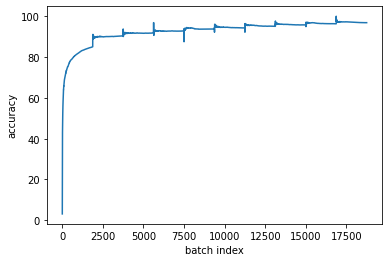

In [10]:
plt.plot(train_acc_history_batch)
plt.xlabel("batch index")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

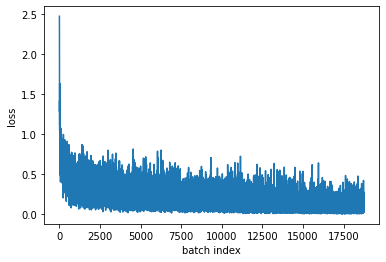

In [11]:
plt.plot(train_loss_history_batch)
plt.xlabel("batch index")
plt.ylabel("loss")